**A dataset about cans of beer.**

Data from http://craftcans.com/

**Do your importing and your setup**

In [1]:
import pandas as pd
%matplotlib inline

**Read in the file `craftcans.csv`, and look at the first first rows**

In [14]:
df = pd.read_csv("craftcans.csv", na_values=["Unknown", "UNKNOWN", "unknown", "-999", "???"])
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


**How many rows do you have in the data? What are the column types?**

In [15]:
df.shape

(2416, 7)

In [16]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

In [17]:
df.columns

Index(['Beer', 'Brewery', 'Location', 'Style', 'Size', 'ABV', 'IBUs'], dtype='object')

**Checking out breweries**

Where does beer come from????

**What are the top 10 producers of cans of beer?**

In [18]:
df['Brewery'].value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
SanTan Brewing Company        19
Name: Brewery, dtype: int64

**What is the most common size of beer?**

The answer won't be pretty - we'll learn to clean it up in a week or two.

In [19]:
df['Size'].value_counts().head()

12 oz.               1507
16 oz.                814
24 oz.                 21
16 oz. Alumi-Tek®      15
12 oz                  14
Name: Size, dtype: int64

**What is the most common ABV? (alcohol by volume)**

In [20]:
df['ABV'].value_counts().head() 

5.00%    215
5.50%    158
6.00%    125
6.50%    123
5.20%    107
Name: ABV, dtype: int64

**Oh, weird, ABV isn't a number. Convert it to a number for me, please.**

It's going to take three steps:

1. List just the ABV of every row
2. Remove the % symbol
3. Convert it to a `float`
4. Save it into a new column. Or the same column, if you're feeling wild.

Although it *also* turns out that there's some bad data in there. We'll need to clean that up, too.

In [21]:
# list of ABVs of every row
df['ABV'].head(5)

0    4.50%
1    4.90%
2    4.80%
3    6.00%
4    6.00%
Name: ABV, dtype: object

In [22]:
# Remove % and replace it with nothing using str.replace("%","")
# then overwrite the old column so it doesn't have any %s in it anymore
# turn the object into a float using astype(float)

df['ABV'] = df['ABV'].str.replace("%","").astype(float)
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0


**Looking at location**

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

**What are the top 10 cities in the US for canned craft beer?**

In [26]:
df['Location'].value_counts(ascending=False).head()

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Name: Location, dtype: int64

**List all of the beer from Brooklyn, NY**

In [28]:
# Use na=False to eliminate NA values from data
brooklyn_beer = df[df['Location'].str.contains('Brooklyn, NY', na=False)]
brooklyn_beer

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


**What brewery in Brooklyn puts out the most cans of beer?**

In [29]:
# Use previous varibale brooklyn_beer to search breweries in Brooklyn.
brooklyn_beer['Brewery'].value_counts()

Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Brewery, dtype: int64

**What are the five most popular styles of beer produced by Sixpoint?**

In [30]:
brooklyn_beer[brooklyn_beer['Brewery'].str.contains('Sixpoint Craft Ales', na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
1057,Global Warmer,Sixpoint Craft Ales,"Brooklyn, NY",American Strong Ale,12 oz.,7.0,70.0
1074,Autumnation (2013),Sixpoint Craft Ales,"Brooklyn, NY",American IPA,16 oz.,6.7,74.0
1267,The Crisp,Sixpoint Craft Ales,"Brooklyn, NY",German Pilsener,16 oz.,5.4,42.0


**List all of the breweries in New York state. Then count them.**

In [35]:
df[df['Location'].str.contains(' NY', na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
598,8 Barrel,Chatham Brewing,"Chatham, NY",American Strong Ale,16 oz.,8.0,69.0
599,Oktoberfest,Chatham Brewing,"Chatham, NY",Märzen / Oktoberfest,16 oz.,5.5,40.0
628,Cream Ale,Newburgh Brewing Company,"Newburgh, NY",Cream Ale,12 oz.,4.2,35.0


In [34]:
# add ['Brewery'].count() to find how many breweries are in New York state.

df[df['Location'].str.contains(' NY', na=False)]['Brewery'].count()

74

**Measuring International Bitterness Units**

IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

**What is the average IBU measurement across all beers?**

In [36]:
df.columns

Index(['Beer', 'Brewery', 'Location', 'Style', 'Size', 'ABV', 'IBUs'], dtype='object')

In [38]:
df['IBUs'].mean()

42.713167259786474

**Draw the distribution of IBU measurements, but with *thirty* bins instead of the default of 10**

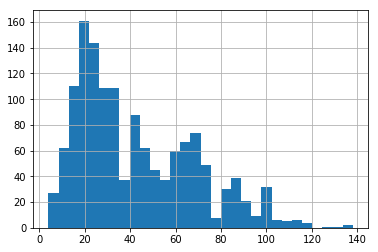

In [39]:
df['IBUs'].hist(bins=30)

**List all of the beers with IBUs above the 75th percentile**

In [40]:
# Use describe() to get an overview of the distrubition.

df['IBUs'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [41]:
df[df['IBUs']>64].head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0


**List all of the beers with IBUs below the 25th percentile**

In [42]:
df[df['IBUs']<21].head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0


**List the median IBUs of each type of beer. Graph it.**

Put the highest at the top, and the nan ones at the bottom. I want a nice graph, too - don't let them all be squished together, either!

In [45]:
# 1. Find beer styles using groupby('Styles) and IBUs. 
# 2. Do something on ['IBUs'] and get the mean.
median_ibus = df.groupby('Style')['IBUs'].mean().sort_values().dropna()
median_ibus.head()

Style
Berliner Weissbier         7.800000
Gose                       9.428571
American Adjunct Lager    11.000000
Light Lager               11.666667
Fruit / Vegetable Beer    14.200000
Name: IBUs, dtype: float64

In [47]:
median_ibus.to_frame().head()

,IBUs
Style,
Berliner Weissbier,7.800000
Gose,9.428571
American Adjunct Lager,11.000000
Light Lager,11.666667
Fruit / Vegetable Beer,14.200000


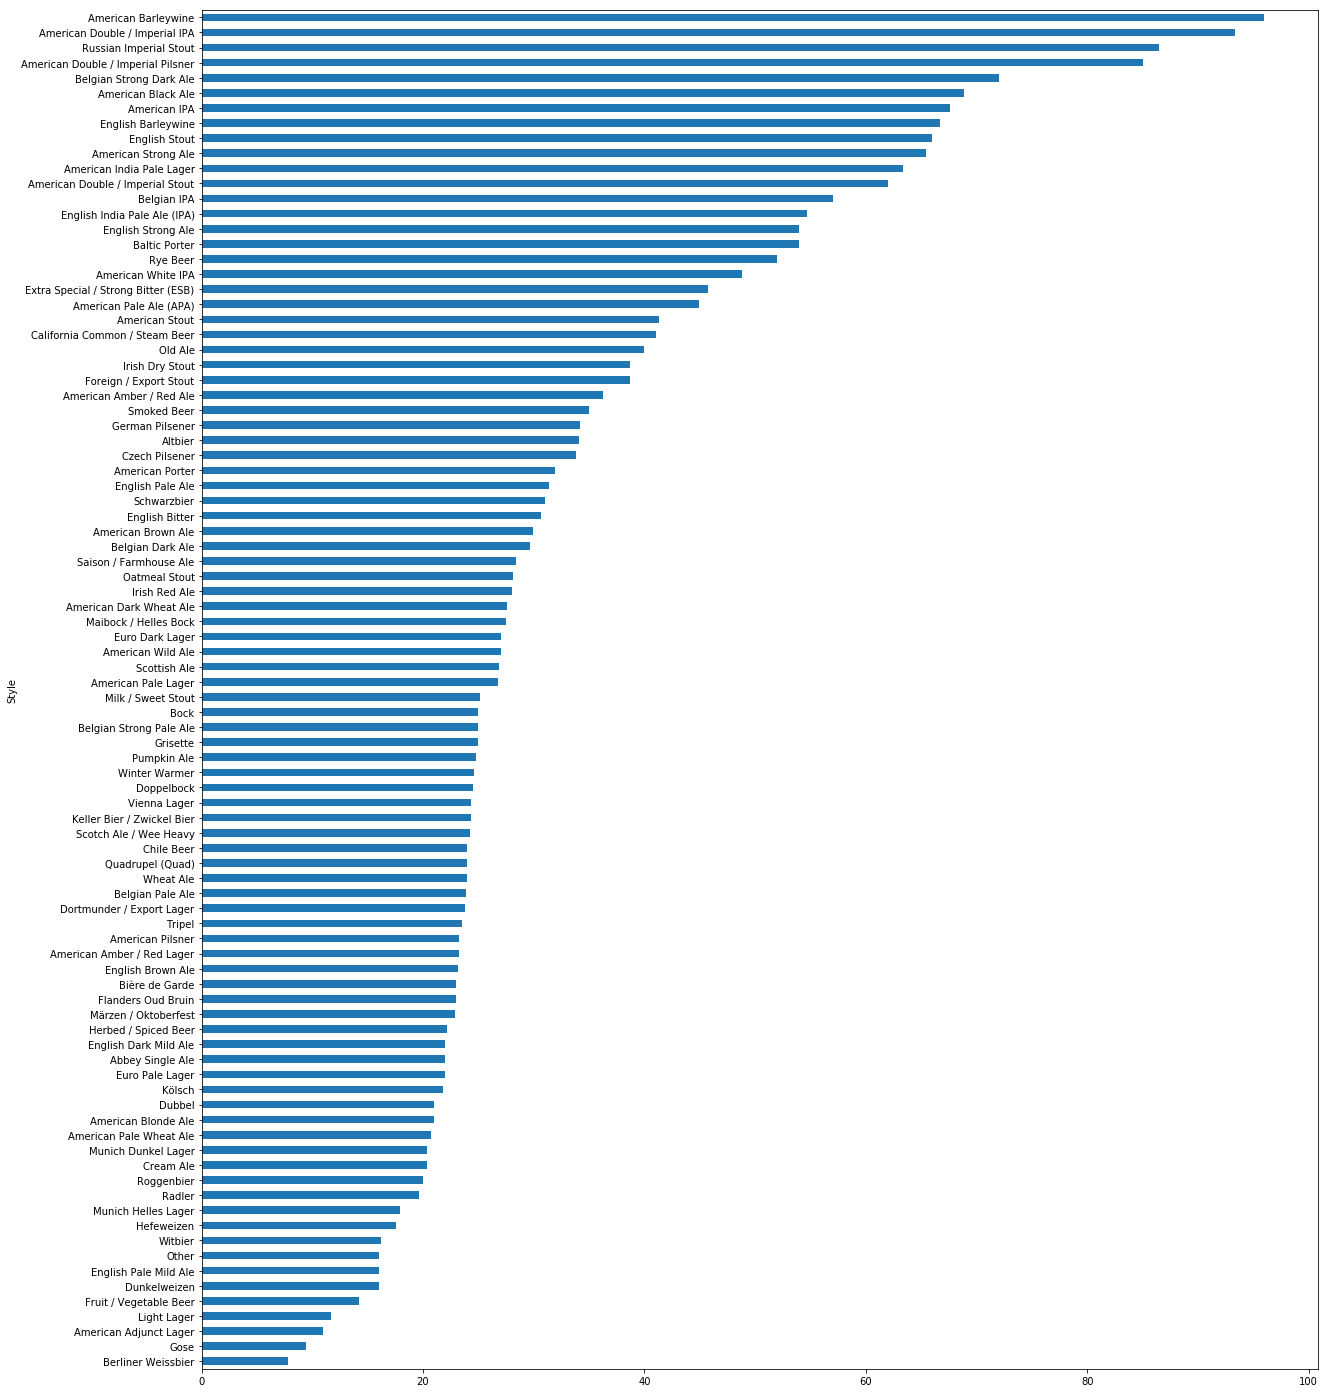

In [54]:
median_ibus.plot(kind='barh',x='Style',y='IBUs',figsize=(20,25))

**Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?**

You'll want to think about it in three pieces - finding the high IBU beers, then finding out what the most common styles are, then getting the top 5.

In [50]:
# Again, use describe() to get a feel of the distribution
df['IBUs'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [62]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
# na_position : {‘first’, ‘last’}, default ‘last’
# first puts NaNs at the beginning, last puts NaNs at the end
    
high_ibus = df.groupby('Style')['IBUs'].median().sort_values(ascending = False, na_position='last').head(5)
high_ibus

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
Name: IBUs, dtype: float64

In [64]:
low_ibus = df.groupby('Style')['IBUs'].median().sort_values(ascending = False, na_position='last').dropna().tail(5)
low_ibus

Style
Hefeweizen                15.0
Light Lager               12.0
Gose                      10.0
American Adjunct Lager     9.0
Berliner Weissbier         8.0
Name: IBUs, dtype: float64

**Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles (also draw a histogram)**

I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

In [92]:
# Match many possibilities. Somewhat similar to the monochrome question in dogs data.

# colors = ['BLACK', 'Black', 'WHITE', 'White', 'GRAY', 'Gray']
# new_frames['monochrome'] = new_frames[['Animal Dominant Color','Animal Secondary Color','Animal Third Color']].isin(colors)
# new_frames['monochrome'].value_counts()

beer_names = ['Witbier', 'Hefeweizen', 'American Pale Wheat Ale']
average_ibus_beers = df[df['Style'].isin(beer_names)]['IBUs']
average_ibus_beers.mean()

18.982142857142858

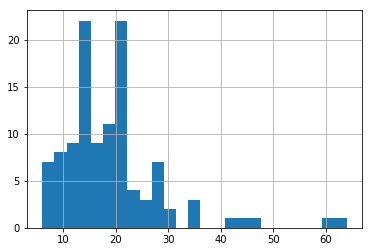

In [109]:
beers_graph = average_ibus_beers.hist(bins=25)
beers_graph

**Get the average IBU of any style with "IPA" in it (also draw a histogram)**

In [105]:
ipa_beers = df['Style'].str.contains('IPA', na=False)
ipa_beers_avg = df[ipa_beers].groupby('Style')['IBUs'].mean()
ipa_beers_avg

Style
American Double / Imperial IPA    93.320000
American IPA                      67.634551
American White IPA                48.833333
Belgian IPA                       57.000000
English India Pale Ale (IPA)      54.714286
Name: IBUs, dtype: float64

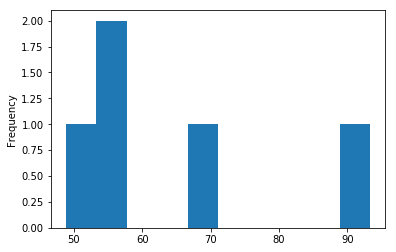

In [108]:
ipa_beers_avg.plot(kind='hist')

**Plot those two histograms on top of one another**

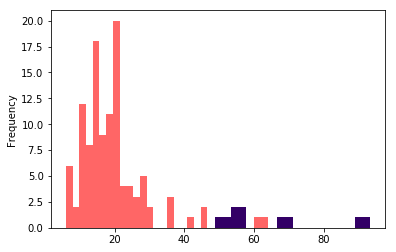

In [117]:
# Plotting charts on top of each other

ax = df[df['Style'].isin(beer_names)]['IBUs'].plot(kind='hist', color='#FF6666', bins=30)
df[ipa_beers].groupby('Style')['IBUs'].mean().plot(kind='hist', color='#330066', ax = ax)

**Compare the ABV of wheat beers vs. IPAs**

In [119]:
abv_wheat_beers = df[df['Style'].str.contains("Wheat", na=False)]
abv_wheat_beers['ABV'].mean()

4.8089552238805968

In [120]:
abv_ipa_beers = df[df['Style'].str.contains("IPA", na=False)]
abv_ipa_beers['ABV'].mean()
#ipa_beers.dtypes

6.9142857142857137